# **Vivek Kulthe - Required Assignment 11.1: Building, Training and Evaluating a Classifier Model - Section B**

**Assignment Instructions:**

Business case: Build a classifier model to predict the survival of passenger for titanic data set.

Prepare a Python notebook to run the below mentioned Python steps on the given data set. Please read the instructions carefully.

# **1. Import Libraries/Data set**

##**1.A) Import the required libraries and the dataset**

In [54]:
# Step 1.A: Import Libraries
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for statistical data visualization
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, auc

Mounted at /content/drive


In [55]:
# Step 1.B: Load the dataset
data_path = '/content/drive/MyDrive/Colab Notebooks/dataset/titanic.csv'
df = pd.read_csv(data_path)

# **2. Exploratory data analysis**

##**2.A) Plot at least two EDA graphs (use matplotlib/seaborn/any other library)**

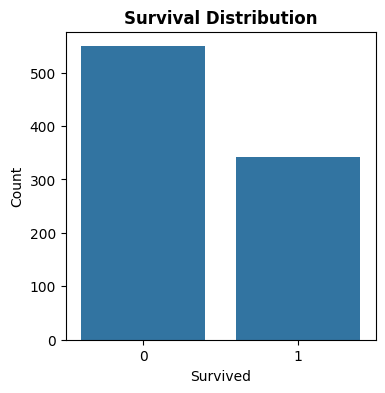

In [56]:
plt.figure(figsize = (4, 4))
sns.countplot(x = 'Survived', data = df)
plt.title('Survival Distribution', fontweight = 'bold')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

<Figure size 200x200 with 0 Axes>

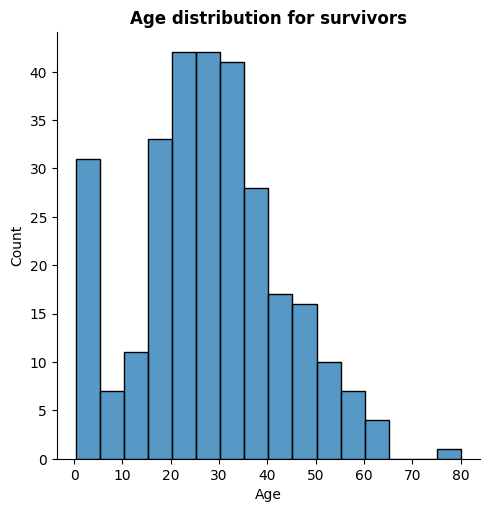

In [57]:
plt.figure(figsize = (2, 2))
sns.displot(df[df['Survived'] == 1]['Age'])  # Age distribution for survivors
plt.title('Age distribution for survivors', fontweight = 'bold')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

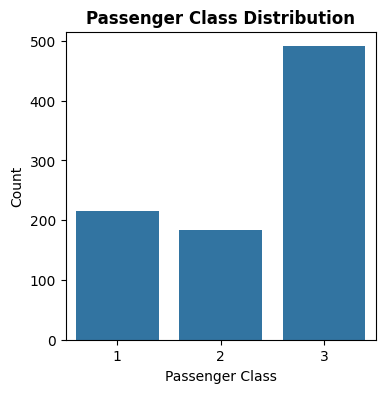

In [58]:
plt.figure(figsize = (4, 4))
sns.countplot(x = 'Pclass', data = df)
plt.title('Passenger Class Distribution', fontweight = 'bold')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

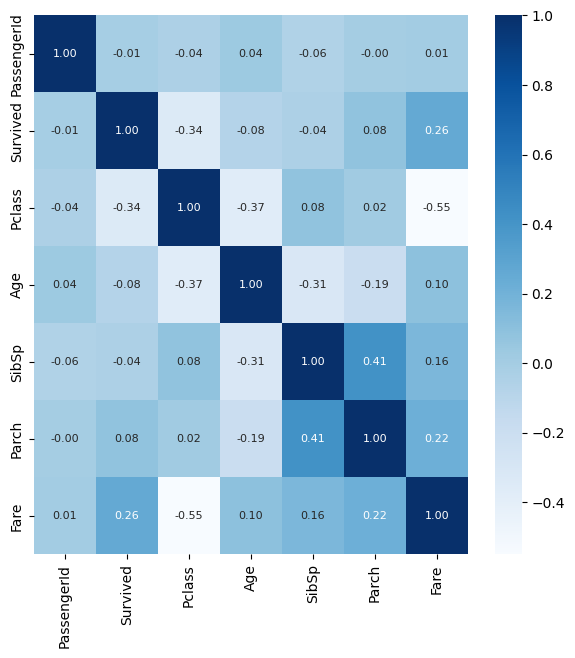

In [59]:
plt.figure(figsize = (7, 7))
numerical = [col for col in df.columns if df[col].dtypes != 'O']
sns.heatmap(df[numerical].corr(), cmap = 'Blues', annot = True, annot_kws={"size": 8}, fmt = '.2f')
plt.show()

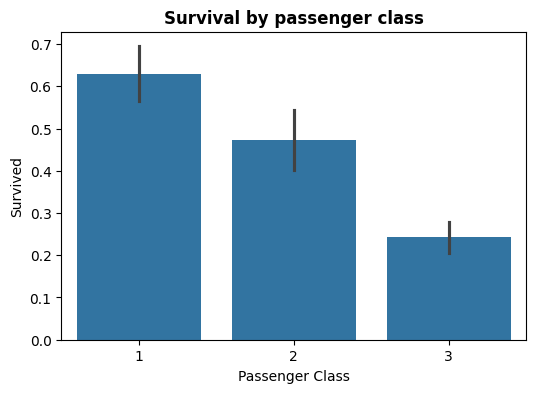

In [60]:
plt.figure(figsize = (6, 4))
sns.barplot(x='Pclass', y='Survived', data=df)  # Survival by passenger class
plt.title('Survival by passenger class', fontweight = 'bold')
plt.xlabel('Passenger Class')
plt.ylabel('Survived')
plt.show()

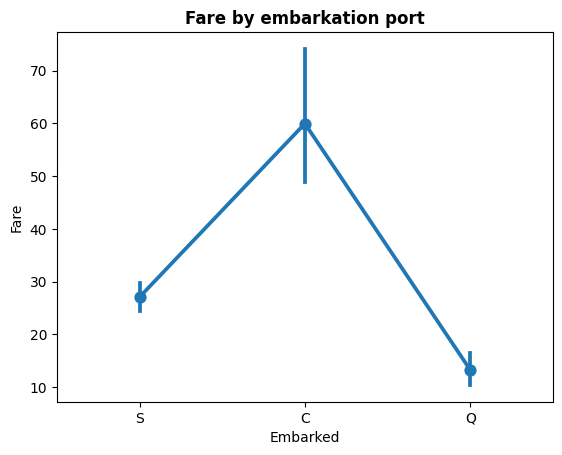

In [61]:
sns.pointplot(x='Embarked', y='Fare', data=df)  # Fare by embarkation port
plt.title('Fare by embarkation port', fontweight = 'bold')
plt.xlabel('Embarked')
plt.ylabel('Fare')
plt.show()

## **2.B) Prepare data to be able to build a classification model**

In [62]:
# view dimensions of dataset
df.shape

(891, 12)

In [63]:
# preview the dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [64]:
# view summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [65]:
# find categorical variables
categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :\n\n', categorical)

There are 5 categorical variables

The categorical variables are :

 ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [66]:
# find numerical variables
numerical = [col for col in df.columns if df[col].dtypes != 'O']
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :\n\n', numerical)

There are 7 numerical variables

The numerical variables are :

 ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [67]:
# view the categorical variables
df[categorical].head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S


In [68]:
# view the numerical variables
df[numerical].head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


## **2.C) Bring the train and test data in the required format**

In [69]:
# Bring the train and test data in the required format

X = df.drop(['Survived','PassengerId','Ticket','Name','Cabin'], axis=1)  # Features
y = df['Survived']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [70]:
# display categorical variables
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']
categorical

['Sex', 'Embarked']

In [71]:
# display numerical variables
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']
numerical

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

## **2.D) Perform missing values check**

Missing Values Check in **Categorical** variables in **TRAINING SET**

In [72]:
# print percentage of missing values in the categorical variables in training set
X_train[categorical].isnull().mean()

Sex         0.00000
Embarked    0.00321
dtype: float64

In [73]:
# impute missing categorical variables with most frequent value
for df2 in [X_train, X_test]:
    df2['Embarked'].fillna(X_train['Embarked'].mode()[0], inplace=True)

In [74]:
# check missing values in categorical variables in X_train
X_train[categorical].isnull().sum()

Sex         0
Embarked    0
dtype: int64

Missing Values Check in **Categorical** variables in **TESTING SET**

In [75]:
# check missing values in categorical variables in X_test
X_test[categorical].isnull().sum()

Sex         0
Embarked    0
dtype: int64

In [76]:
# check missing values in categorical variables in X_train
X_train[numerical].isnull().sum()

Pclass      0
Age       121
SibSp       0
Parch       0
Fare        0
dtype: int64

In [77]:
# impute missing categorical variables with most frequent value
for df2 in [X_train, X_test]:
    df2['Age'].fillna(X_train['Age'].mean(), inplace=True)

In [78]:
# check missing values in categorical variables in X_train
X_train[numerical].isnull().sum()

Pclass    0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

In [79]:
# check missing values in categorical variables in X_test
X_test[numerical].isnull().sum()

Pclass    0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

In [80]:
# check missing values in X_train
X_train.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [81]:
# check missing values in X_test
X_test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

## **2.E) Perform scaling of data**

In [82]:
le = LabelEncoder()
X_train['Sex'] = le.fit_transform(X_train['Sex'])
X_test['Sex'] = le.fit_transform(X_test['Sex'])

X_train['Embarked'] = le.fit_transform(X_train['Embarked'])
X_test['Embarked'] = le.fit_transform(X_test['Embarked'])

In [83]:
cols = X_train.columns

In [84]:
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [85]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [86]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [87]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,-1.333333,0.0,1.621897,0.0,0.0,0.492275,0.0
1,-1.333333,-1.0,1.468051,1.0,0.0,2.630973,-2.0
2,0.000000,0.0,-2.224257,5.0,2.0,1.359616,0.0
3,-1.333333,0.0,1.852666,0.0,1.0,2.654768,0.0
4,0.000000,-1.0,0.000000,1.0,0.0,-0.023088,-2.0


## **2.F) Print the shapes of train and test data**

In [88]:
# check the shape of X_train and X_test
X_train.shape, X_test.shape

((623, 7), (268, 7))

In [89]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,-1.333333,0.0,1.621897,0.0,0.0,0.492275,0.0
1,-1.333333,-1.0,1.468051,1.0,0.0,2.630973,-2.0
2,0.000000,0.0,-2.224257,5.0,2.0,1.359616,0.0
3,-1.333333,0.0,1.852666,0.0,1.0,2.654768,0.0
4,0.000000,-1.0,0.000000,1.0,0.0,-0.023088,-2.0


In [90]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.000000,0.0,0.000000,0.0,0.0,-0.023088,-2.0
1,0.000000,0.0,0.000000,0.0,0.0,-0.317528,0.0
2,0.000000,0.0,-1.762718,4.0,1.0,0.602025,-1.0
3,-1.333333,-1.0,0.000000,1.0,0.0,5.605575,-2.0
4,0.000000,-1.0,-0.070411,0.0,2.0,0.010476,-2.0


# **3. Naïve Bayes Model Building**

##**3.A) Build a Naïve bayes classification model**

In [91]:
# train a Gaussian Naive Bayes classifier on the training set
# build the model
gnb = GaussianNB()

##**3.B) Train the model on the train data set**

In [92]:
# Train the model
gnb.fit(X_train, y_train)

GaussianNB()

In [93]:
# Predict The Results
y_gnb_pred = gnb.predict(X_test)
y_gnb_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1])

##**3.C) Print the model summary**



In [94]:
print("\nClassification Report:")
print(classification_report(y_test, y_gnb_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.80      0.83       168
           1       0.70      0.76      0.73       100

    accuracy                           0.79       268
   macro avg       0.77      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268



# **4. SVM Model Building**

##**4.A) Build a SVM classification model**

In [95]:
# train a SVM classifier on the training set
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# instantiate the model
clf = SVC(kernel='rbf')

##**4.B) Train the model on the train data set**

In [96]:
# Train the model
clf.fit(X_train,y_train)

SVC()

In [97]:
# Predict The Results
y_clf_pred = clf.predict(X_test)
y_clf_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0])

##**4.C) Print the model summary**



In [98]:
print("\nClassification Report:")
print(classification_report(y_test, y_clf_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       168
           1       0.75      0.70      0.73       100

    accuracy                           0.80       268
   macro avg       0.79      0.78      0.79       268
weighted avg       0.80      0.80      0.80       268



#**5. Model Evaluation**

##**5.A) Check the Naïve bayes model’s performance by printing accuracy, confusion matrix, F1 score and AUC-ROC curve**

In [99]:
# Print accuracy
gnb_accuracy = accuracy_score(y_test, y_gnb_pred)
print("Accuracy:", gnb_accuracy)

# Print confusion matrix
gnb_confusion_matrix = confusion_matrix(y_test, y_gnb_pred)
print("Confusion Matrix:\n", gnb_confusion_matrix)

# Print F1 score (assuming binary classification)
gnb_f1 = f1_score(y_test, y_gnb_pred)
print("F1 Score:", gnb_f1)

# Calculate ROC AUC score
y_proba = gnb.predict_proba(X_test)[:, 1]  # Probability of positive class
gnb_auc = roc_auc_score(y_test, y_proba)
print("AUC-ROC Score:", gnb_auc)

Accuracy: 0.7873134328358209
Confusion Matrix:
 [[135  33]
 [ 24  76]]
F1 Score: 0.7272727272727273
AUC-ROC Score: 0.8317857142857142


##**5.B) Check the SVM model’s performance by printing accuracy, confusion matrix, F1 score and AUC-ROC curve**

In [100]:
# Calculate accuracy
clf_accuracy = accuracy_score(y_test, y_clf_pred)
print("Accuracy:", clf_accuracy)

# Calculate confusion matrix
clf_confusion_matrix = confusion_matrix(y_test, y_clf_pred)
print("Confusion Matrix:\n", clf_confusion_matrix)

# Calculate F1 score (assuming you want F1 for both classes)
clf_f1 = f1_score(y_test, y_clf_pred, average='binary')
print("F1 Score:", clf_f1)

# ROC AUC (assuming binary classification)
# Get the true and false positive rates
fpr, tpr, thresholds = roc_curve(y_test, y_clf_pred)

# Calculate the area under the ROC curve (AUC)
clf_roc_auc = auc(fpr, tpr)
print("AUC-ROC:", clf_roc_auc)


Accuracy: 0.8022388059701493
Confusion Matrix:
 [[145  23]
 [ 30  70]]
F1 Score: 0.7253886010362695
AUC-ROC: 0.7815476190476192


#**6. Compare the performances of SVM and Naïve bayes models for the titanic dataset**

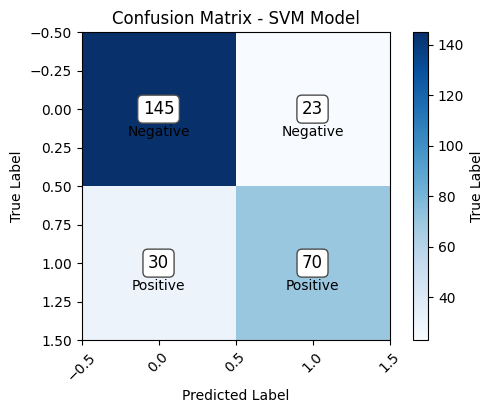

In [114]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(6, 4))

plt.imshow(clf_confusion_matrix, interpolation='nearest', cmap="Blues")  # Adjust colormap as desired
plt.colorbar(label='True Label') # Set labels for each axis

ax = plt.gca()
ax.tick_params(axis='x', labelrotation=45) # Rotate x-axis labels for readability
ax.tick_params(axis='y', labelrotation=0) # Keep y-axis labels horizontal

data_labels = ['Negative', 'Positive']

# Annotate the confusion matrix with cell values and data labels
for i in range(len(clf_confusion_matrix)):
    for j in range(len(clf_confusion_matrix[0])):
        plt.text(j, i, clf_confusion_matrix[i, j], ha='center', va='center',fontsize=12, bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))
        plt.text(j, i+0.1, data_labels[i], ha='center', va='top', fontsize=10, color='black')  # Add data labels above each cell

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - SVM Model')
plt.show()

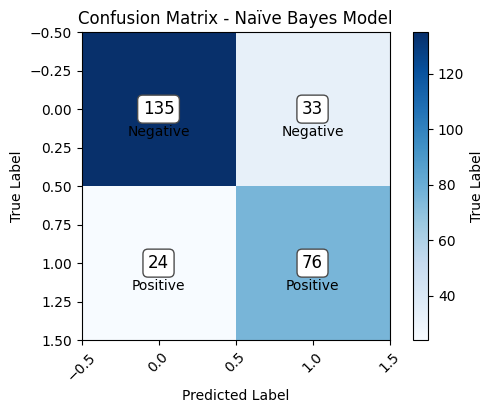

In [115]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(6, 4))

plt.imshow(gnb_confusion_matrix, interpolation='nearest', cmap="Blues")  # Adjust colormap as desired
plt.colorbar(label='True Label') # Set labels for each axis

ax = plt.gca()
ax.tick_params(axis='x', labelrotation=45) # Rotate x-axis labels for readability
ax.tick_params(axis='y', labelrotation=0) # Keep y-axis labels horizontal

data_labels = ['Negative', 'Positive']

# Annotate the confusion matrix with cell values and data labels
for i in range(len(gnb_confusion_matrix)):
    for j in range(len(gnb_confusion_matrix[0])):
        plt.text(j, i, gnb_confusion_matrix[i, j], ha='center', va='center',fontsize=12, bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))
        plt.text(j, i+0.1, data_labels[i], ha='center', va='top', fontsize=10, color='black')  # Add data labels above each cell

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Naïve Bayes Model')
plt.show()

In [109]:
SVM_data = columns = {'Accuracy' : clf_accuracy, 'F1 Score' : clf_f1, 'AUC-ROC' : clf_roc_auc}
SVM_report = pd.DataFrame(SVM_data, index = ['Support Vector Machine'])
GNB_data = columns = {'Accuracy' : gnb_accuracy, 'F1 Score' : gnb_f1, 'AUC-ROC' : gnb_auc}
GNB_report = pd.DataFrame(GNB_data, index = ['Naïve Bayes'])

report = [GNB_report, SVM_report]

final_report = pd.DataFrame()
for rx in report:
    final_report = pd.concat([final_report, rx])

final_report = final_report.sort_values('Accuracy', ascending = False)
final_report

,Accuracy,F1 Score,AUC-ROC
Support Vector Machine,0.802239,0.725389,0.781548
Naïve Bayes,0.787313,0.727273,0.831786


# **Based on the above observations:**

# **The Support Vector Machine Model has better performance based on its higher accuracy score.**

# **Accuracy reflects the model's ability to correctly classify all data points, regardless of class.**